# 병충해 분석 AI 프로젝트

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')
import warnings
warnings.filterwarnings('ignore')

������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [34]:
import os
import cv2
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/data/project02

/content/drive/MyDrive/data/project02


## 1. 파일읽기

In [35]:
import numpy as np
import pandas as pd
import os


train_csv = pd.read_csv('data/train_df_csv.csv')
val_csv = pd.read_csv('data/val_df_csv.csv')

print('end')

end


# for문으로 각 작물당 2000개씩 샘플 묶기
- 1 고추
- 2 무
- 3 배추
- 4 애호박 삭제
- 5 양배추
- 6 오이
- 7 토마토
- 8 콩
- 9 파
- 10 호박 삭제

> 총 8개의 작물 (곤충과 겹치는 작물)


In [36]:
tc = train_csv[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
tc

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,0,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,0,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a01_20201103_0001_S01_...,0,1,13,0,"[{'xtl': 484, 'ytl': 1227, 'xbr': 3879, 'ybr':...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a01_20201103_0003_S01_...,0,1,13,0,"[{'xtl': 1241, 'ytl': 103, 'xbr': 2344, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0000_S01_...,0,1,13,0,"[{'xtl': 1382, 'ytl': 978, 'xbr': 3226, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
14434,V006_79_1_18_09_03_13_1_0819e_20201117_133.jpg,18,9,13,1,"[{'xtl': 135, 'ytl': 0, 'xbr': 875, 'ybr': 961}]",파_1.질병
14435,V006_79_1_18_09_03_13_1_0819e_20201117_134.jpg,18,9,13,1,"[{'xtl': 293, 'ytl': 0, 'xbr': 520, 'ybr': 961}]",파_1.질병
14436,V006_79_1_18_09_03_13_1_0819e_20201118_137.jpg,18,9,13,1,"[{'xtl': 2, 'ytl': 0, 'xbr': 722, 'ybr': 878}]",파_1.질병
14437,V006_79_1_18_09_03_13_1_0819e_20201118_139.jpg,18,9,13,1,"[{'xtl': 192, 'ytl': 0, 'xbr': 636, 'ybr': 961}]",파_1.질병


In [48]:
train_csv[train_csv['crop']==6]

,image,disease,crop,grow,risk,points,name
7183,V006_79_0_00_06_01_13_0_b02_20201014_0000_S01_...,0,6,13,0,"[{'xtl': 548, 'ytl': 1022, 'xbr': 3760, 'ybr':...",오이_0.정상
7184,V006_79_0_00_06_01_13_0_b02_20201014_0001_S01_...,0,6,13,0,"[{'xtl': 470, 'ytl': 1431, 'xbr': 3235, 'ybr':...",오이_0.정상
7185,V006_79_0_00_06_01_13_0_b02_20201014_0002_S01_...,0,6,13,0,"[{'xtl': 440, 'ytl': 1041, 'xbr': 3486, 'ybr':...",오이_0.정상
7186,V006_79_0_00_06_01_13_0_b02_20201014_0003_S01_...,0,6,13,0,"[{'xtl': 768, 'ytl': 1260, 'xbr': 3050, 'ybr':...",오이_0.정상
7187,V006_79_0_00_06_01_13_0_b02_20201014_0004_S01_...,0,6,13,0,"[{'xtl': 736, 'ytl': 1194, 'xbr': 3473, 'ybr':...",오이_0.정상
...,...,...,...,...,...,...,...
8959,V006_79_1_12_06_03_13_3_7390w_20201207_56.jpeg,12,6,13,3,"[{'xtl': 545, 'ytl': 432, 'xbr': 2905, 'ybr': ...",오이_1.질병
8960,V006_79_1_12_06_03_13_3_7390w_20201207_6.jpeg,12,6,13,3,"[{'xtl': 929, 'ytl': 268, 'xbr': 3209, 'ybr': ...",오이_1.질병
8961,V006_79_1_12_06_03_13_3_7390w_20201207_61.jpeg,12,6,13,3,"[{'xtl': 533, 'ytl': 232, 'xbr': 2761, 'ybr': ...",오이_1.질병
8962,V006_79_1_12_06_05_13_1_0502bb_20201102_2.jpeg,12,6,13,1,"[{'xtl': 1135, 'ytl': 838, 'xbr': 3008, 'ybr':...",오이_1.질병


In [37]:
tc = train_csv[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
df = pd.DataFrame(index=range(0,), columns=['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name'])
# [] 안에 작물 코드 넣기
for i in [6]:
    for k in range(19):
        if k == 0:
            tmp = tc[(tc['crop'] == i)&(tc['disease'] == k)][:1000]
            df = pd.concat([df, tmp])
        else:
            tmp = tc[(tc['crop'] == i)&(tc['disease'] == k)][:500]
            df = pd.concat([df, tmp])


train_df = df

In [38]:
train_df = train_df[['image', 'disease', 'crop', 'grow', 'risk']]
train_df.reset_index(drop=True, inplace=True)

In [39]:
train_df

,image,disease,crop,grow,risk
0,V006_79_0_00_06_01_13_0_b02_20201014_0000_S01_...,0,6,13,0
1,V006_79_0_00_06_01_13_0_b02_20201014_0001_S01_...,0,6,13,0
2,V006_79_0_00_06_01_13_0_b02_20201014_0002_S01_...,0,6,13,0
3,V006_79_0_00_06_01_13_0_b02_20201014_0003_S01_...,0,6,13,0
4,V006_79_0_00_06_01_13_0_b02_20201014_0004_S01_...,0,6,13,0
...,...,...,...,...,...
1776,V006_79_1_12_06_03_13_3_7390w_20201207_56.jpeg,12,6,13,3
1777,V006_79_1_12_06_03_13_3_7390w_20201207_6.jpeg,12,6,13,3
1778,V006_79_1_12_06_03_13_3_7390w_20201207_61.jpeg,12,6,13,3
1779,V006_79_1_12_06_05_13_1_0502bb_20201102_2.jpeg,12,6,13,1


In [40]:
vc = val_csv[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
vc

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201103_0000_S01_...,0,1,13,0,"[{'xtl': 502, 'ytl': 1261, 'xbr': 3781, 'ybr':...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201103_0002_S01_...,0,1,13,0,"[{'xtl': 817, 'ytl': 1564, 'xbr': 3693, 'ybr':...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a05_20201111_0009_S01_...,0,1,13,0,"[{'xtl': 697, 'ytl': 967, 'xbr': 3797, 'ybr': ...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a05_20201111_0014_S01_...,0,1,13,0,"[{'xtl': 627, 'ytl': 1294, 'xbr': 3783, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0024_S01_...,0,1,13,0,"[{'xtl': 1002, 'ytl': 458, 'xbr': 3380, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
9100,V006_79_1_18_09_03_13_3_0819e_20201112_151.jpg,18,9,13,3,"[{'xtl': 308, 'ytl': 468, 'xbr': 542, 'ybr': 1...",파_1.질병
9101,V006_79_1_18_09_03_13_3_0819e_20201127_172.jpg,18,9,13,3,"[{'xtl': 0, 'ytl': 341, 'xbr': 960, 'ybr': 960}]",파_1.질병
9102,V006_79_1_18_09_03_13_3_6734e_20201030_50.jpg,18,9,13,3,"[{'xtl': 79, 'ytl': 2, 'xbr': 433, 'ybr': 960}]",파_1.질병
9103,V006_79_1_18_09_03_13_3_6734e_20201117_48.jpg,18,9,13,3,"[{'xtl': 355, 'ytl': 0, 'xbr': 657, 'ybr': 960}]",파_1.질병


In [41]:
vc = val_csv[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
df = pd.DataFrame(index=range(0,), columns=['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name'])
# [] 안에 작물 코드 넣기
for i in [6]:
    for k in range(19):
        if k == 0:
            tmp = vc[(vc['crop'] == i)&(vc['disease'] == k)][:1000]
            df = pd.concat([df, tmp])
        else:
            tmp = vc[(vc['crop'] == i)&(vc['disease'] == k)][:500]
            df = pd.concat([df, tmp])


val_df = df

In [42]:
val_df = val_df[['image', 'disease', 'crop', 'grow', 'risk']]
val_df.reset_index(drop=True, inplace=True)
val_df

,image,disease,crop,grow,risk
0,V006_79_0_00_06_01_13_0_b02_20201014_0005_S01_...,0,6,13,0
1,V006_79_0_00_06_01_13_0_b02_20201014_0016_S01_...,0,6,13,0
2,V006_79_0_00_06_01_13_0_b02_20201014_0023_S01_...,0,6,13,0
3,V006_79_0_00_06_01_13_0_b02_20201014_0024_S01_...,0,6,13,0
4,V006_79_0_00_06_01_13_0_b02_20201014_0028_S01_...,0,6,13,0
...,...,...,...,...,...
1102,V006_79_1_12_06_03_13_3_3221w_20201115_73.JPEG,12,6,13,3
1103,V006_79_1_12_06_03_13_3_3221w_20201115_82.jpg,12,6,13,3
1104,V006_79_1_12_06_03_13_3_3221w_20201115_86.jpg,12,6,13,3
1105,V006_79_1_12_06_03_13_3_3244w_20201104_15.jpeg,12,6,13,3


# x y 데이터셋 제작
- x: train 이미지
- y: train disease 번호

## train

In [43]:
# 폴더 리스트 가져오기
from glob import glob
from PIL import Image
import numpy as np


X=[]
train_dis = list(train_df['disease'])
train_img = list(train_df['image'])
train_cro = list(train_df['crop'])
path = 'data/project/'


for i in range(len(train_df)):
    img = Image.open(path + str(train_cro[i])+ '/train/' + str(train_dis[i]) + '/' + train_img[i])
    img = img.resize((255, 255)) ## 혹시몰라 한번더 리사이즈
    imgarr = np.array(img)/255 # 스케일링
    X.append(imgarr)

In [44]:
print(np.shape(X))

(1781, 255, 255, 3)


In [45]:
y = []
for item in train_df['disease']:
  y.append(item)

In [46]:
print(np.shape(y))

(1781,)


In [47]:
np.unique(y)

array([ 0, 11, 12])

In [49]:
# 작물 질병 확인하여 질병 순서대로 레이블 변경
# 오이 5 : 오이흰가루병
# 오이 6 : 오이노균병
for i in range(len(y)):
        if y[i] == 11.0:
            y[i] = 1.0
        elif y[i] == 12.0:
            y[i] = 2.0

In [50]:
np.unique(y)

array([0., 1., 2.])

In [51]:
type(X), type(y)

(list, list)

In [52]:
# np.array 로 변환해야 작업 가능
X_train = np.array(X, dtype='float32')
y_train = np.array(y, dtype='float32')

In [53]:
# npz 파일 제작
np.savez('data/train_cucumber.npz', X=X_train, Y=y_train)

## validation

In [54]:
# 폴더 리스트 가져오기
from glob import glob
from PIL import Image
import numpy as np


X=[]
val_dis = list(val_df['disease'])
val_img = list(val_df['image'])
val_cro = list(val_df['crop'])
path = 'data/project/'


for i in range(len(val_df)):
    img = Image.open(path + str(val_cro[i])+ '/validation/' + str(val_dis[i]) + '/' + val_img[i])
    img = img.resize((255, 255)) ## 혹시몰라 한번더 리사이즈
    imgarr = np.array(img)/255 # 스케일링
    X.append(imgarr)

In [55]:
print(np.shape(X))

(1107, 255, 255, 3)


In [56]:
y = []
for item in val_df['disease']:
  y.append(item)

In [57]:
print(np.shape(y))

(1107,)


In [58]:
np.unique(y)

array([ 0, 11, 12])

In [59]:
# 작물 질병 확인하여 질병 순서대로 레이블 변경
# 오이 5 : 오이흰가루병
# 오이 6 : 오이노균병
for i in range(len(y)):
        if y[i] == 11.0:
            y[i] = 1.0
        elif y[i] == 12.0:
            y[i] = 2.0

In [60]:
np.unique(y)

array([0., 1., 2.])

In [61]:
type(X), type(y)

(list, list)

In [62]:
# np.array 로 변환해야 작업 가능
X_val = np.array(X)
y_val = np.array(y)

In [63]:
# npz 파일 제작
np.savez('data/val_cucumber.npz', X=X_val, Y=y_val)

--x값--


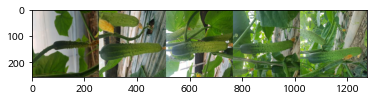

--y value--
[0, 0, 0, 0, 0]


In [64]:
# 5개의 이미지를 수평으로 나란히 출력
import matplotlib.pyplot as plt

print('--x값--')
plt.imshow(np.hstack(X[:5]))
plt.show()

print('--y value--')
print(y[:5])

## CNN

In [1]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]

## 사용 패키지

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')
import warnings
warnings.filterwarnings('ignore')

������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [2]:
import os
import cv2
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

## 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
cd /content/drive/MyDrive/data/project02

/content/drive/MyDrive/data/project02


In [7]:
!ls

best_model.h5  train_cucumber.npz   train_plant.npz   val_plant_all.npz
data	       train_df_csv.csv     val_cucumber.npz  val_plant.npz
data.zip       train_plant_5.npz    val_df_csv.csv
model	       train_plant_all.npz  val_plant_5.npz


In [3]:
train_npz = np.load('data/train_cucumber.npz')
test_npz = np.load('data/val_cucumber.npz')
print(list(train_npz))
print(list(test_npz))

['X', 'Y']
['X', 'Y']


In [4]:
X_train = train_npz['X']
y_train = train_npz['Y']

In [5]:
X_val = test_npz['X']
y_val = test_npz['Y']

In [6]:
print(np.shape(X_train), len(y_train))
print(np.shape(X_val), len(y_val))

(1781, 255, 255, 3) 1781
(1107, 255, 255, 3) 1107


In [7]:
# y데이터의 분할은 편향없이 잘 되었는가 확인작업

unique, counts = np.unique(y_train, return_counts=True)

unique_yt = dict(zip(unique, counts))
unique_yt

{0.0: 1000, 1.0: 392, 2.0: 389}

In [8]:
# y데이터의 분할은 편향없이 잘 되었는가 확인작업

unique, counts = np.unique(y_val, return_counts=True)

unique_yv = dict(zip(unique, counts))
unique_yv

{0.0: 1000, 1.0: 51, 2.0: 56}

# 5. CNN
- 컨볼루션 신경망
- 컴퓨터 비전 (Computer Vision) 에서 사용
- 텍스트, 시계열 데이터 등에서도 성능 좋음
- 오버피팅 회피
    - 규제화 함수
        - 가중치 감쇠 (Weight Decay)
        - 모델 복잡도 제한
        - L1, L2 노름, 엘라스틱 넷 (Elastic Net)
        - 기능에 맞춰 가중치 합 구해 손실 함수에 더함
        - tensorflow.keras.regularizers.l1(l = 0.01) : 가중치 절대값 합 (릿지)
        - tensorflow.keras.regularizers.l2(l = 0.01) : 가중치 제곱값 합 (라쏘)
        - tensorflow.keras.regularizers.l1_l2(l1 = 0.01, l2 = 0.01) : 가중치 절대값 합 (릿지) + 가중치 제곱값 합 (라쏘) = (엘라스틱 넷)
    - 드롭 아웃
        - 학습 진행 중 신경망 일부 유닛 제외
        - 테스트 중 작동 하지 않고 모든 유닛 활성화
        - 출력을 드롭 아웃 비율만큼 제외
        - 드롭 아웃 비율 0.2 ~ 0.5
    - 배치 정규화
        - 드롭 아웃과 비교
        - 내부 공선성 (Internal Covariance Shift) 해결 방법
        - 출력값 범위 제한 -> 불확실성 감소 목적
        - 그래디언트 손실, 폭주 없이 높은 학습률 사용 가능
        - 자체적 규제화 효과 포함
        - Dense or Conv2D -> BatchNormalization() -> Activation()

In [9]:
# 배치정규화 제외
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
model = Sequential()
# (255, 255, 3)
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 input_shape = (255, 255, 3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 kernel_regularizer = l2(0.001)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, kernel_regularizer = l2(0.001)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(3, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 255, 255, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 255, 255, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      1

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('data/model/cucumber_best.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# es : 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 10회 증가하면 학습을 조기 종료(Early Stopping)합니다. 
# mc : 또한, ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.

In [12]:
model.compile(
    optimizer = Adam(1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [13]:
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 32,
    callbacks=[mc],
    validation_data = (X_val, y_val)
)

Epoch 1/100
56/56 [==============================] - 32s 246ms/step - loss: 1.5625 - acc: 0.6238 - val_loss: 0.8995 - val_acc: 0.9277

Epoch 00001: val_acc improved from -inf to 0.92773, saving model to data/model\cucumber_best.h5
Epoch 2/100
56/56 [==============================] - 10s 180ms/step - loss: 0.9471 - acc: 0.8467 - val_loss: 0.8249 - val_acc: 0.8636

Epoch 00002: val_acc did not improve from 0.92773
Epoch 3/100
56/56 [==============================] - 10s 181ms/step - loss: 0.7409 - acc: 0.8916 - val_loss: 0.8761 - val_acc: 0.8428

Epoch 00003: val_acc did not improve from 0.92773
Epoch 4/100
56/56 [==============================] - 10s 182ms/step - loss: 0.6507 - acc: 0.9163 - val_loss: 0.7983 - val_acc: 0.8537

Epoch 00004: val_acc did not improve from 0.92773
Epoch 5/100
56/56 [==============================] - 10s 180ms/step - loss: 0.5786 - acc: 0.9332 - val_loss: 1.4192 - val_acc: 0.6703

Epoch 00005: val_acc did not improve from 0.92773
Epoch 6/100
56/56 [==========

## 그래프

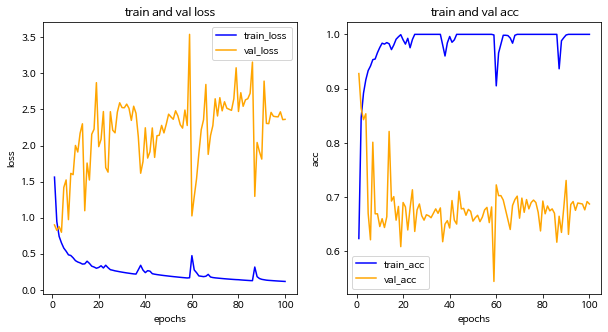

In [14]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))
# 훈련, 검증 손실
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()
acc = his_dict['acc']
val_acc = his_dict['val_acc']
# 훈련, 검증 정확도
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

In [15]:
from tensorflow.keras.models import load_model
loaded_model = load_model('data/model/cucumber_best.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_val, y_val)[1]))

35/35 [==============================] - 1s 35ms/step - loss: 0.8995 - acc: 0.9277

 테스트 정확도: 0.9277


In [16]:
from keras.models import load_model
model.save('data/model/cucumber_last.h5')

In [17]:
from tensorflow.keras.models import load_model
loaded_model = load_model('data/model/cucumber_last.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_val, y_val)[1]))

35/35 [==============================] - 1s 37ms/step - loss: 2.3630 - acc: 0.6874

 테스트 정확도: 0.6874
